#Pima Indians Diabetes Database Descriptive Statistics Project

# Introduction
Pima Indians Diabetes Database Descriptive Statistics Project
Predict the onset of diabetes based on diagnostic measures. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes, based on certain diagnostic measurements included in the dataset.

**Columns of the dataset**

**Pregnancies**: Number of times pregnant 

**Glucose**: Plasma glucose concentration 2 hours in an oral glucose tolerance test

**Blood Pressure**: Diastolic blood pressure (mm Hg)

**Skin Thickness**: Triceps skin fold thickness (mm

**Insulin**: 2-Hour serum insulin (mu U/ml)

**BMI**: Body mass index (weight in kg/(height in m)^2) 

**Diabetes Pedigree Function**: Diabetes pedigree function

**Age**: Age (years)

**Outcome**: Class variable (0 or 1) 0 mean non-diabetic and 1 means diabetic


## Objective
to done descriptive statistical analysis on diabetes dataset

## Analysis
1. Please do the basic exploration of data and explain all datatypes (nominal, ordinal, discrete or continuous).
2. Calculate appropriate measures of central tendency for Glucose and outcome column variable only? Do not give all results.
3. Please provide 5 points data summaries for required columns?
4. Please create an appropriate plot to see the distribution of Outcome variable?
5. Is there a difference in glucose level between diabetic and non-diabetic? Similarly for insulin and diabetic vs nondiabetic.
6. Please examine the relationship between insulin and glucose level using appropriate plot.
7. Please examine the distribution of numerical data and explain which variables normally distributed and which variables are seem to be skewed. Please also tell the direction of skewness.
8. Please calculate the skewness value and divide variables into symmetrical, moderately skewed and highly skewed.
9. Please create appropriate plot to examine the outliers of these variables. Please name the variables which have outliers. 
10. What should be the measures of central tendency and dispersion for skewed data?  
11. If there are missing values, please try to fill those missing values and give appropriate reasons.
12. If skewness is present, try to perform transformation and explain the results.


## Data collection

### Import libraries

In [1]:
import pandas as pd # read into dataframes
import numpy as np # mathematical calculations
import matplotlib.pyplot as plt  # visualization libraries
import seaborn as sns

### Read dataset into pandas dataframe

In [2]:
df= pd.read_csv('mandatory_diabetes.csv')  # reading dataset
df.head()  # check 1st 5 rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 1.Please do the basic exploration of data and explain all datatypes (nominal, ordinal, discrete or continuous)

# Basic exploration of data

In [3]:
df.shape  # no. of rows and columns

(768, 9)

In [4]:
df.columns # all names of columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Explaining data types
Here from above function, there are 2 types of datatypes.float and integer.all columns are numerical.

0. pregnencies can count, so its datatype is discrete int64.
1. glucose value can have continuous value, so its data type is floatt64.
2. Blood pressure can have continuous value, so it is continuous,convert to float64.
3. Skin thickness is can be continuous, beacuse we measure it , so its data type is float64.
4. Insulin can be continuous, so its data type is float64.
5. BMI has continuous value, so its datatype is float.
6.Diabetes pedigree function is also continuous value, so its data type is float.
7. Age can be continous ,so float64.
8. outcome is nominal,it should be category as diabetic or non diabetic. so we have to convert its datatype.

#### Converting datatype of outcome

In [7]:
d=df[['Age','Glucose','BloodPressure','SkinThickness','Insulin']]
for col in d:
  df[col]=df[col].astype('float')


In [8]:
df['Outcome']=df['Outcome'].astype('category') # converting ino category
df.info()  # again check data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    float64 
 2   BloodPressure             768 non-null    float64 
 3   SkinThickness             768 non-null    float64 
 4   Insulin                   768 non-null    float64 
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    float64 
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(7), int64(1)
memory usage: 49.0 KB


In [9]:
df.isnull().count()  # checking null values

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

## 2. Calculate appropriate measures of central tendency for Glucose and outcome column variable only? Do not give all results
Measures of central tendency for glucose and outcome:
* mean
* median
* mode
* as outcome is category datatype variable,we dont calculate measure of central tendency to it.it is calculated only for numerical columns.But we can calculate central tendency when outcome is 1 and outcome is 0.For this we need to split data for diabetic and non diabetic.
For symmetric data, we calculate measure of central tendency for mean.
For unsymmetric data, we calculate measure of central tendency for median.

## splitting dataset into diabetic and non diabetic

In [10]:
df_d= df[df['Outcome']==1]   # 1 means diabetic,all outcome 1 values store in df_d
df_d.head()  # check 1st 5 rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
2,8,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1


In [11]:
df_non= df[df['Outcome']==0]   # 0 means non diabetic,all outcome 0 values store in df_non
df_non.head()  # check 1st 5 rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
5,5,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0
7,10,115.0,0.0,0.0,0.0,35.3,0.134,29.0,0
10,4,110.0,92.0,0.0,0.0,37.6,0.191,30.0,0


## measures of central tendency for diabetic patients

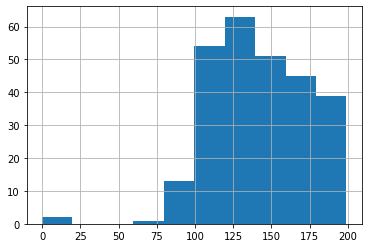

In [12]:
df_d['Glucose'].hist()

In [17]:
df_d['Glucose'].skew()

-0.49555709300308276

it looks almost unskewed data,because skew value is less than 0.5.so we have to calculate measure of central tendency is mean.


In [18]:

print('mean for diabetic:', df_d['Glucose'].mean())


mean for diabetic: 141.25746268656715


## measures of central tendency for non diabetic patients

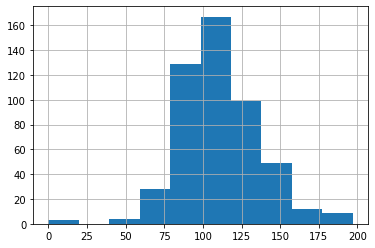

In [14]:
df_non['Glucose'].hist()

In [15]:
df_non['Glucose'].skew()

0.1731111204325696

it looks almost symmetrical,so we have to calculate measure of central tendency for mean

In [16]:
print('mean for diabetic:', df_non['Glucose'].mean())


mean for diabetic: 109.98


as outcome is categorical variable, so mean,median,wont exist for it.so we dont calculate measure of central tendency.

## 3.Please provide 5 points data summaries for required columns?
we can get 5 points data summaries by describe function.it will apply on numerical columns 

In [ ]:
df_d.describe()  # data summary for diabetic population

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164
std,3.741239,31.939622,21.491812,17.679711,138.689125,7.262967,0.372354,10.968254
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000
25%,1.750000,119.000000,66.000000,0.000000,0.000000,30.800000,0.262500,28.000000
50%,4.000000,140.000000,74.000000,27.000000,0.000000,34.250000,0.449000,36.000000
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000


A summary consists of five values: the most extreme values in the data set (the maximum and minimum values), the lower and upper quartiles, and the median. These values are presented together and ordered from lowest to highest: minimum value, lower quartile (Q1), median value (Q2), upper quartile (Q3), maximum value.
Here, min is minimum value of numerical columns,max is maximim value of numerical columns,Q1 is 25%,Q2 is 50%, Q3 is 75%.

In [ ]:
df_non.describe()  # data summary for non-diabetic population

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,3.298000,109.9800,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
std,3.017185,26.1412,18.063075,14.889947,98.865289,7.689855,0.299085,11.667655
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,93.0000,62.000000,0.000000,0.000000,25.400000,0.229750,23.000000
50%,2.000000,107.0000,70.000000,21.000000,39.000000,30.050000,0.336000,27.000000
75%,5.000000,125.0000,78.000000,31.000000,105.000000,35.300000,0.561750,37.000000
max,13.000000,197.0000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000


 ## 4. Please create an appropriate plot to see the distribution of Outcome variable?
 as outcome is categorical columns, we can create box plot for distribution.so plot for outcome for 0 and 1.here it will give median,min value,max value,25%,75%.here we take numerical column as age

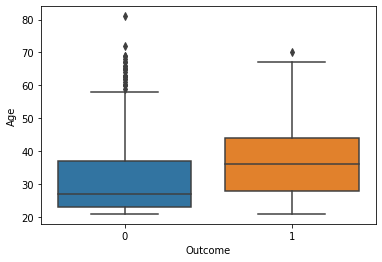

In [34]:

sns.boxplot(x= df['Outcome'],y=df['Age']) # for diabetic & non diabetic

Here outcome distribution for age is in 2 catogeries,0 for non diabetic,1 for diabetic.outliers also present in both diabetic and non diabetic .for diabetic, outcome looks symmetrical. for non-diabetic,outcome looks skewed.for diabetic,median is nearly 40. for non diabetic, median is between 20and 30.For increasing age, diabetics are more.

## 5.Is there a difference in glucose level between diabetic and non-diabetic? Similarly for insulin and diabetic vs nondiabetic.

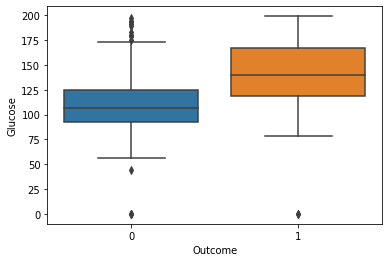

In [38]:
sns.boxplot(x= df['Outcome'],y=df['Glucose'])

For diabetic, glucose median value at 130,non diabetic, it is at 110.outliers are present in both of them.i looks almost symmetrical.there is difference for diabetic  non-diabetic.

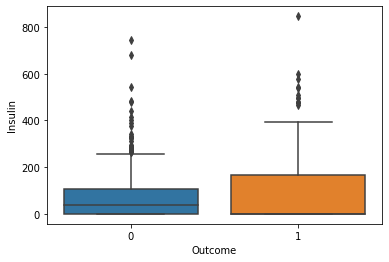

In [35]:
sns.boxplot(x= df['Outcome'],y=df['Insulin'])  # insulin distribution for outcome

* For Diabetic,Insulin level is between 0-200,for non-diabetic,it is 0-100 approximately.
* Non diabetic glucose level lies between 80-125.for diabetes glucose level is fro 120-175.
* by comparing 2 values we can say, there is difference glucose and insulin levels for diabetic and non-diabetic..
* for diabetic,insulin level is more than for non diabetic.
* insulin levels are more than glucose level.

##6. Please examine the relationship between insulin and glucose level using appropriate plot
As both are numerical values, and we have to check relation between them. we can plot scatter plot for them.

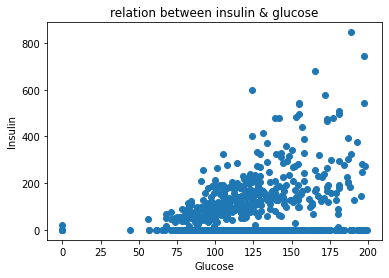

In [ ]:
plt.scatter(x=df['Glucose'],y=df['Insulin'])  # to check relation
plt.title('relation between insulin & glucose')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.show()

Here, when glucose increases,insulin also increasing, so it is positively correlated.

## 7.Please examine the distribution of numerical data and explain which variables normally distributed and which variables are seem to be skewed. Please also tell the direction of skewness.



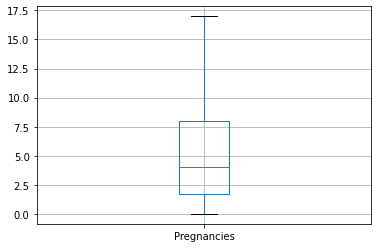

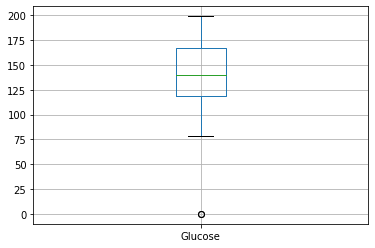

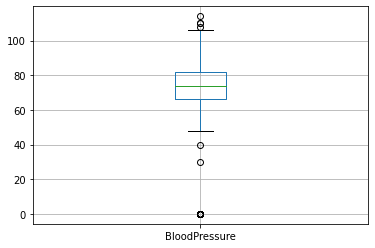

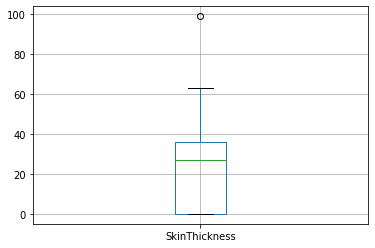

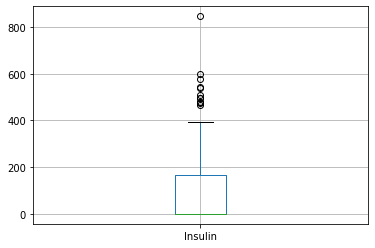

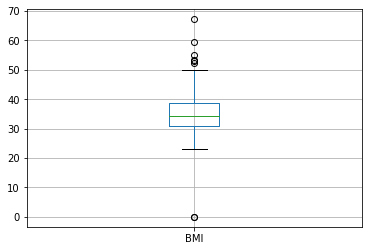

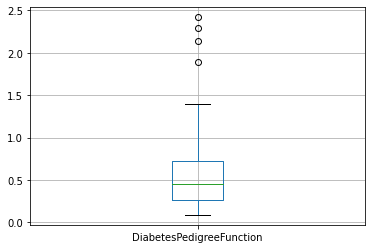

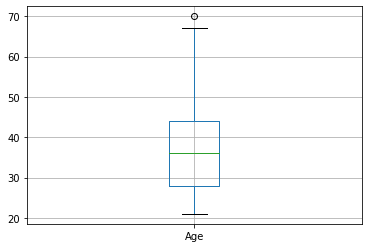

In [ ]:
df1=df_d.select_dtypes(exclude=['category'])  # remove outcomme column
for column in df1:                             # use for loop for all columns
    plt.figure()
    df1.boxplot([column])                     # plotting boxplot

Normal|left|right skewed
---|---|---
Blood pressure|skin thickness|Pregnency
Glucose||Diabetespedigreefunction
Age|
BMI|

Insulin we cant say by looking plot

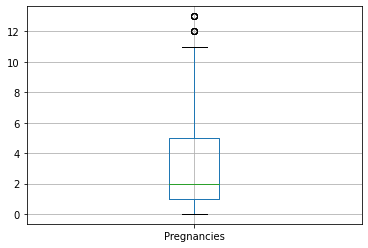

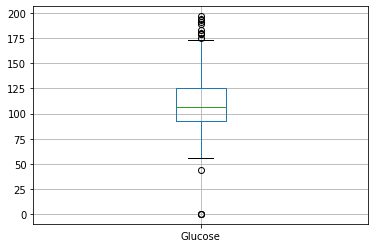

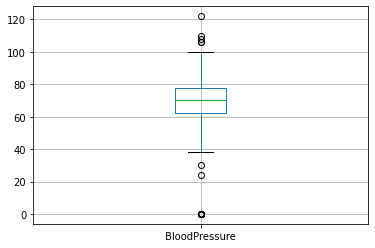

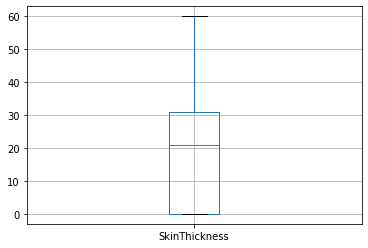

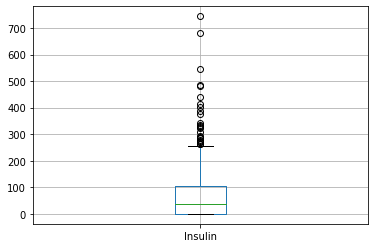

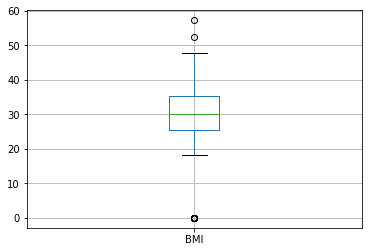

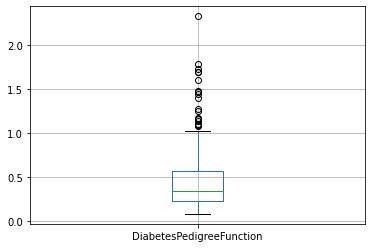

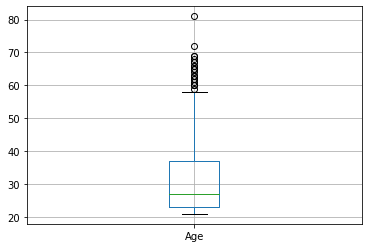

In [ ]:
df2=df_non.select_dtypes(exclude=['category'])   # remove outcome in non diabetic population
for column in df2:                             # use for loop for all columns
    plt.figure()               
    df2.boxplot([column])                       # boxplot for distribution

normal|left skewed|right skewed
---|---|----|
BMI||Age
BloodPressure|skin thickness|Daibetespedigreefunction
glucose||Insulin
||pregnancies


## 8.Please calculate the skewness value and divide variables into symmetrical, moderately skewed and highly skewed.

In [ ]:
df_d.skew()         # this function gives skewness values of all column,near to 0 means symmerical

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Pregnancies                 0.503749
Glucose                    -0.495557
BloodPressure              -1.943633
SkinThickness               0.115910
Insulin                     1.843831
BMI                         0.000597
DiabetesPedigreeFunction    1.722373
Age                         0.581646
dtype: float64

In Diabetic population,-0.5 to 0.5 are fairly symmetrical,
+_0.5 to +-1 are moderately skewed,more than 1 are highly skewed

  

Symmetrical|Moderately skewed|  Highly Skewed
----|----|---
BMI  |Pregnencies  |Blood pressure
    Skin thickness||Insuin
 glucose   |Age|DiabetespedigreeFunction
   || 

In [ ]:
df_non.skew()  # non diabetic skewness value

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Pregnancies                 1.114105
Glucose                     0.173111
BloodPressure              -1.809825
SkinThickness               0.031155
Insulin                     2.498741
BMI                        -0.665902
DiabetesPedigreeFunction    2.006242
Age                         1.571609
dtype: float64

Symmetrical(-0.5 to 0.5)| Moderately skewed(+-)(0.5-1) | highly skewed(>1)|
---|---|--|
Skin thickness|  |Insulin
  Glucose | BMI   | DiabetesPedigreeFunction
     | |Age,Pregnencies
     |    | Blood pressure    

##9.Please create appropriate plot to examine the outliers of these variables. Please name the variables which have outliers.
we can create box plot for all variables in one plot for checking outliers.

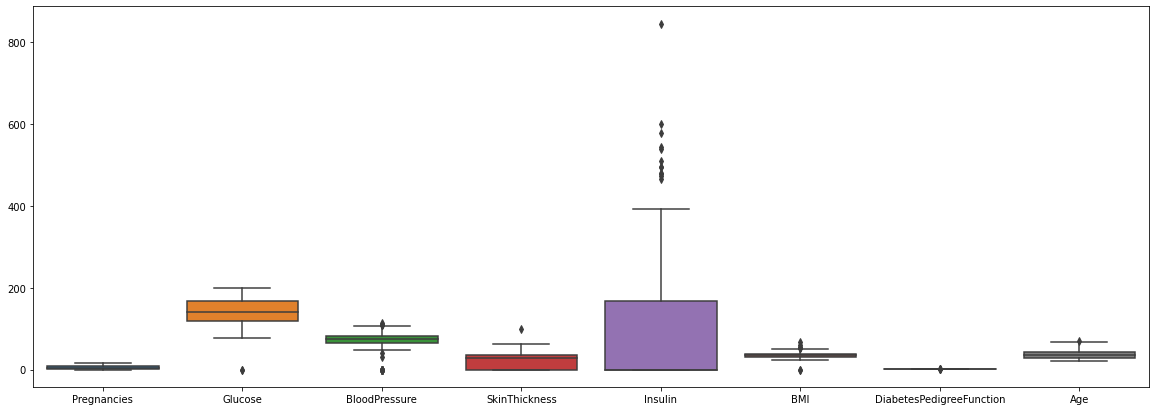

In [ ]:
plt.figure(figsize=(20,7))  # for bigger size
sns.boxplot(data=df_d)  # box plot for diabetic population variables

Glucose,Bloodpressure, skin thickness,insulin,BMI,age,diabetespedigreefunction have outliers.
Pregnencies dont have outliers

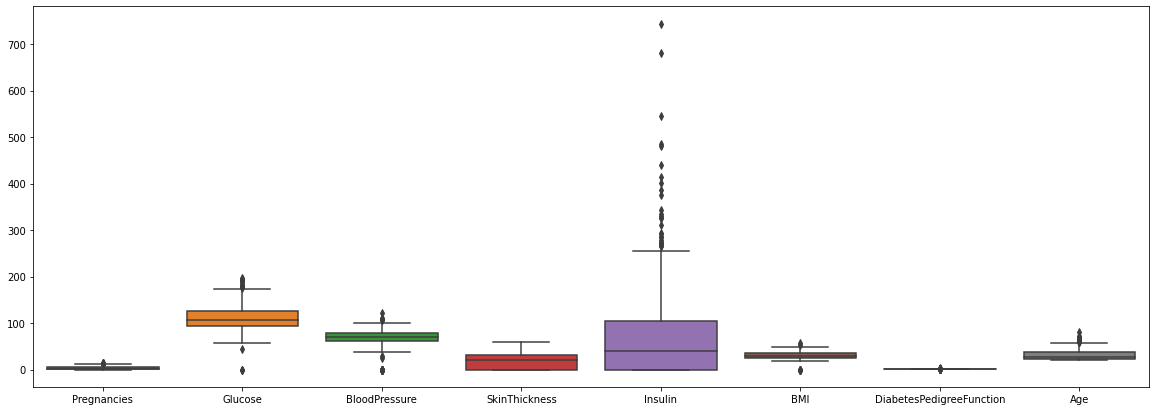

In [ ]:
plt.figure(figsize=(20,7))  # for bigger size
sns.boxplot(data=df_non)  # box plot for non diabetic population variables

skin thickness dont have outliers,all other variables have outliers.

##10.What should be the measures of central tendency and dispersion for skewed data?
For skewed data, we can use median & mode.But Median is highly used for measuring central tendency.the median value is the middle value. Advantage of the median: The median is less affected by outliers and skewed data than the mean, and is usually the preferred measure of central tendency when the distribution is not symmetrical.
The interquartile range is the best measure of variability for skewed distributions or data sets with outliers. Because it's based on values that come from the middle half of the distribution, it's unlikely to be influenced by outliers.

In [ ]:
#diabetic
df_d.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Pregnancies                   4.000
Glucose                     140.000
BloodPressure                74.000
SkinThickness                27.000
Insulin                       0.000
BMI                          34.250
DiabetesPedigreeFunction      0.449
Age                          36.000
dtype: float64

In [ ]:
df_non.median()  # measure of central tendency for non diabetic

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Pregnancies                   2.000
Glucose                     107.000
BloodPressure                70.000
SkinThickness                21.000
Insulin                      39.000
BMI                          30.050
DiabetesPedigreeFunction      0.336
Age                          27.000
dtype: float64

In [ ]:
q3, q1 = np.percentile(df_d, [75 ,25]) # quartiles for diabetic population
iqr = q3 - q1                         # finding iqr
iqr

63.0

In [ ]:
q3, q1 = np.percentile(df_non, [75 ,25]) # quartiles for  non diabetic population
iqr1 = q3 - q1                         # finding iqr
iqr1

59.755

the measures of central tendency and dispersion for skewed data for diabetic & non diabetic population is as follows:

measures|Diabetic |non-diabetic|
---|--- |----|
central Dispersion IQR| 63| 59.75|
central tendency median|
Pregnancies         |          4.000|2.000
Glucose              |       140.000|107.00
BloodPressure         |       74.000|70.0
SkinThickness          |      27.000|21.0
Insulin                 |      0.000|39.00
BMI                      |    34.250|30.050
DiabetesPedigreeFunction  |    0.449|0.366
Age                        |  36.000|27.00

##11.If there are missing values, please try to fill those missing values and give appropriate reasons

In [41]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1


In [42]:
df['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [43]:
df['Pregnancies'].skew()

0.9016739791518588

here 111 are 0, which means null. we can replace with median or mode because it is skewed data.as it is more columns mode is best option.

In [46]:
df['Pregnancies'].mode()

0    1
dtype: int64

In [48]:
df['Pregnancies']=df['Pregnancies'].replace(0,1)
df['Pregnancies'].value_counts()

1     246
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [49]:
df['Age'].value_counts()

22.0    72
21.0    63
25.0    48
24.0    46
23.0    38
28.0    35
26.0    33
27.0    32
29.0    29
31.0    24
41.0    22
30.0    21
37.0    19
42.0    18
33.0    17
38.0    16
36.0    16
32.0    16
45.0    15
34.0    14
46.0    13
43.0    13
40.0    13
39.0    12
35.0    10
50.0     8
51.0     8
52.0     8
44.0     8
58.0     7
47.0     6
54.0     6
49.0     5
48.0     5
57.0     5
53.0     5
60.0     5
66.0     4
63.0     4
62.0     4
55.0     4
67.0     3
56.0     3
59.0     3
65.0     3
69.0     2
61.0     2
72.0     1
81.0     1
64.0     1
70.0     1
68.0     1
Name: Age, dtype: int64

For age no missing value

In [50]:
df['BloodPressure'].value_counts()

70.0     57
74.0     52
78.0     45
68.0     45
72.0     44
64.0     43
80.0     40
76.0     39
60.0     37
0.0      35
62.0     34
66.0     30
82.0     30
88.0     25
84.0     23
90.0     22
86.0     21
58.0     21
50.0     13
56.0     12
52.0     11
54.0     11
75.0      8
92.0      8
65.0      7
85.0      6
94.0      6
48.0      5
96.0      4
44.0      4
100.0     3
106.0     3
98.0      3
110.0     3
55.0      2
108.0     2
104.0     2
46.0      2
30.0      2
122.0     1
95.0      1
102.0     1
61.0      1
24.0      1
38.0      1
40.0      1
114.0     1
Name: BloodPressure, dtype: int64

In [51]:
df['BloodPressure'].skew()

-1.8436079833551302

here we have 35 rows having 0, which means missing values.and also it is skewed data. so replace it with median value.

In [52]:
df['BloodPressure'].median()

72.0

In [53]:
df['BloodPressure']=df['BloodPressure'].replace(0,72)
df['BloodPressure'].value_counts()

72.0     79
70.0     57
74.0     52
78.0     45
68.0     45
64.0     43
80.0     40
76.0     39
60.0     37
62.0     34
66.0     30
82.0     30
88.0     25
84.0     23
90.0     22
58.0     21
86.0     21
50.0     13
56.0     12
52.0     11
54.0     11
75.0      8
92.0      8
65.0      7
94.0      6
85.0      6
48.0      5
96.0      4
44.0      4
98.0      3
100.0     3
106.0     3
110.0     3
55.0      2
30.0      2
104.0     2
46.0      2
108.0     2
61.0      1
38.0      1
24.0      1
122.0     1
102.0     1
95.0      1
40.0      1
114.0     1
Name: BloodPressure, dtype: int64

In [54]:
df['BMI'].value_counts()

32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: BMI, Length: 248, dtype: int64

In [57]:
df['BMI'].skew()

-0.42898158845356543

it has 11 rows of null value, which is 0.and it looks like symmetrical data. so replace with mean value

In [58]:
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())
df['BMI'].value_counts()

32.000000    13
31.600000    12
31.200000    12
31.992578    11
32.400000    10
             ..
36.700000     1
41.800000     1
42.600000     1
42.800000     1
46.300000     1
Name: BMI, Length: 248, dtype: int64

In [59]:
df['DiabetesPedigreeFunction'].value_counts()


0.258    6
0.254    6
0.268    5
0.207    5
0.261    5
        ..
1.353    1
0.655    1
0.092    1
0.926    1
0.171    1
Name: DiabetesPedigreeFunction, Length: 517, dtype: int64

no missing value

In [60]:
df['Insulin'].value_counts()

0.0      374
105.0     11
130.0      9
140.0      9
120.0      8
        ... 
73.0       1
171.0      1
255.0      1
52.0       1
112.0      1
Name: Insulin, Length: 186, dtype: int64

In [61]:
df['Insulin'].skew()

2.272250858431574

it has 374 rows with 0,and it is skewed data. so replace with mode, because more rows having 0.

In [63]:
df['Insulin'].mode()

0    0.0
dtype: float64

as mode is 0, here we replace with median

In [64]:
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())
df['Insulin'].value_counts()


30.5     374
105.0     11
130.0      9
140.0      9
120.0      8
        ... 
73.0       1
171.0      1
255.0      1
52.0       1
112.0      1
Name: Insulin, Length: 186, dtype: int64

In [65]:
df['Glucose'].value_counts()

99.0     17
100.0    17
111.0    14
129.0    14
125.0    14
         ..
191.0     1
177.0     1
44.0      1
62.0      1
190.0     1
Name: Glucose, Length: 136, dtype: int64

Here, no missing values.

In [66]:
df['SkinThickness'].value_counts()

0.0     227
32.0     31
30.0     27
27.0     23
23.0     22
33.0     20
28.0     20
18.0     20
31.0     19
19.0     18
39.0     18
29.0     17
40.0     16
25.0     16
26.0     16
22.0     16
37.0     16
41.0     15
35.0     15
36.0     14
15.0     14
17.0     14
20.0     13
24.0     12
42.0     11
13.0     11
21.0     10
46.0      8
34.0      8
12.0      7
38.0      7
11.0      6
43.0      6
16.0      6
45.0      6
14.0      6
44.0      5
10.0      5
48.0      4
47.0      4
49.0      3
50.0      3
8.0       2
7.0       2
52.0      2
54.0      2
63.0      1
60.0      1
56.0      1
51.0      1
99.0      1
Name: SkinThickness, dtype: int64

In [67]:
df['SkinThickness'].skew()

0.10937249648187608

here 227 rows having null values which is 0,it looks like symmetric data, so we replace it with mean

In [68]:
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['SkinThickness'].value_counts()

20.536458    227
32.000000     31
30.000000     27
27.000000     23
23.000000     22
33.000000     20
28.000000     20
18.000000     20
31.000000     19
19.000000     18
39.000000     18
29.000000     17
40.000000     16
25.000000     16
26.000000     16
22.000000     16
37.000000     16
41.000000     15
35.000000     15
36.000000     14
15.000000     14
17.000000     14
20.000000     13
24.000000     12
42.000000     11
13.000000     11
21.000000     10
46.000000      8
34.000000      8
12.000000      7
38.000000      7
11.000000      6
43.000000      6
16.000000      6
45.000000      6
14.000000      6
44.000000      5
10.000000      5
48.000000      4
47.000000      4
49.000000      3
50.000000      3
8.000000       2
7.000000       2
52.000000      2
54.000000      2
63.000000      1
60.000000      1
56.000000      1
51.000000      1
99.000000      1
Name: SkinThickness, dtype: int64

## 12.If skewness is present, try to perform transformation and explain the results.

here,skeweness is present for some variables.we calculated skewness with skew() function.and we will transform it by using z-score

In [69]:
df_non.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Pregnancies                 1.114105
Glucose                     0.173111
BloodPressure              -1.809825
SkinThickness               0.031155
Insulin                     2.498741
BMI                        -0.665902
DiabetesPedigreeFunction    2.006242
Age                         1.571609
dtype: float64

pregnency,boodpressure, Insulin,BMI,Diabeticpedigree function,Age having skewed data. we have to transform them.

In [70]:
df_d.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Pregnancies                 0.503749
Glucose                    -0.495557
BloodPressure              -1.943633
SkinThickness               0.115910
Insulin                     1.843831
BMI                         0.000597
DiabetesPedigreeFunction    1.722373
Age                         0.581646
dtype: float64

blood pressure,insulin,diabetic pedigree function,age,pregnency having skewed data. we have to transform it

In [72]:
df_non_skewed=df_non[['Pregnancies','BloodPressure','BMI','Insulin','DiabetesPedigreeFunction','Age']] # besd on skew( values,near to 0 are non skewed data)

In [73]:
df_d_skewed=df_d[['Pregnancies','BloodPressure','Insulin','DiabetesPedigreeFunction','Age']]

In [75]:
for col in df_non_skewed:  # use for loop for all columns in non diabetic population
    df_non[col]=np.log(df_non_skewed[col]) # log transformation
df_non.head()# transformed daat

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,0.000000,85.0,4.189655,29.0,-inf,3.280911,-1.046969,3.433987,0
3,0.000000,89.0,4.189655,23.0,4.543295,3.335770,-1.789761,3.044522,0
5,1.609438,116.0,4.304065,0.0,-inf,3.242592,-1.604450,3.401197,0
7,2.302585,115.0,-inf,0.0,-inf,3.563883,-2.009915,3.367296,0
10,1.386294,110.0,4.521789,0.0,-inf,3.627004,-1.655482,3.401197,0


In [80]:
df_non_skewed.skew()

Pregnancies                 1.114105
BloodPressure              -1.809825
BMI                        -0.665902
Insulin                     2.498741
DiabetesPedigreeFunction    2.006242
Age                         1.571609
dtype: float64

skew values are not changing after transformation

we transformed non diabetic data using log transform

In [76]:
for col in df_d_skewed: # use for loop for all columns in diabetic population
    df_d[col]=np.log(df_d_skewed[col]) # log transform
df_d.head()# transformes data

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.791759,148.0,4.276666,35.0,-inf,33.6,-0.466809,3.912023,1
2,2.079442,183.0,4.158883,0.0,-inf,23.3,-0.397497,3.465736,1
4,-inf,137.0,3.688879,35.0,5.123964,43.1,0.827678,3.496508,1
6,1.098612,78.0,3.912023,32.0,4.477337,31.0,-1.394327,3.258097,1
8,0.693147,197.0,4.248495,45.0,6.297109,30.5,-1.845160,3.970292,1


In [81]:
df_d_skewed.skew()

Pregnancies                 0.503749
BloodPressure              -1.943633
Insulin                     1.843831
DiabetesPedigreeFunction    1.722373
Age                         0.581646
dtype: float64

we transformed diabetic data using log transform

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


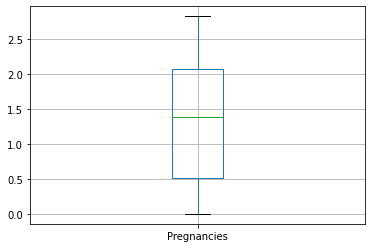

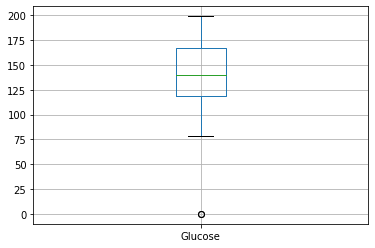

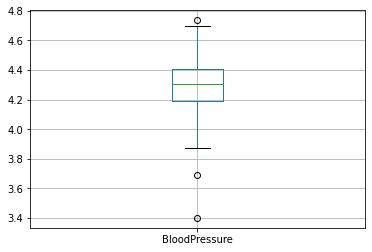

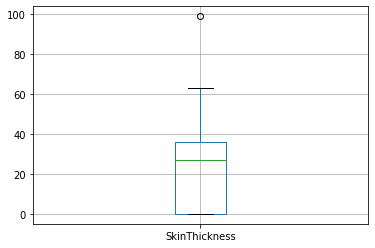

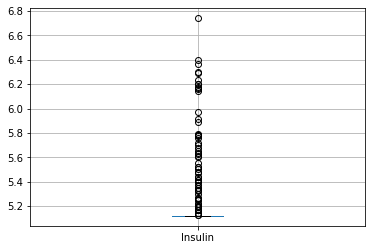

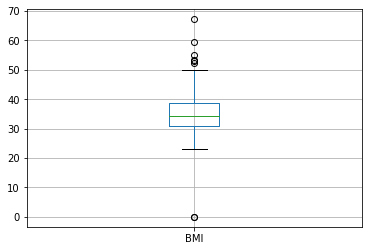

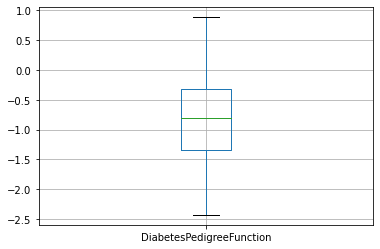

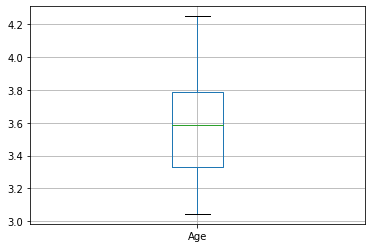

In [77]:
df1=df_d.select_dtypes(exclude=['category'])  # remove outcomme column
for column in df1:                             # use for loop for all columns
    plt.figure()
    df1.boxplot([column]) 

After log transform,insulin has infinite values,all others lokks symmetrical now

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


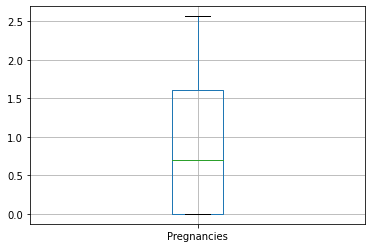

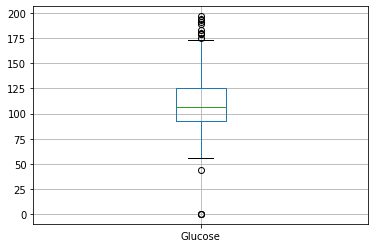

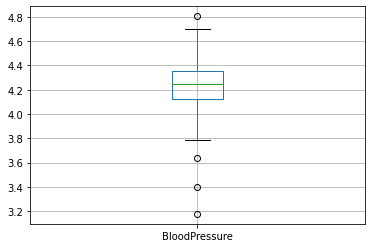

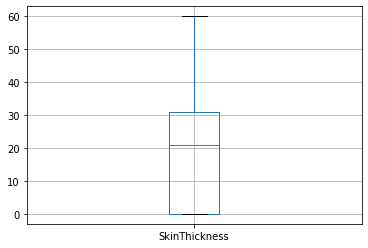

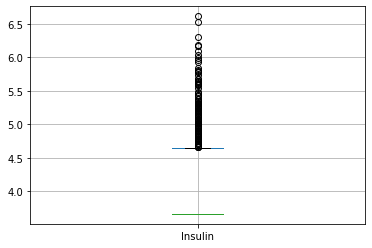

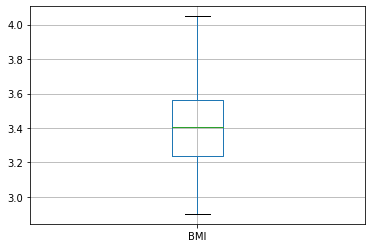

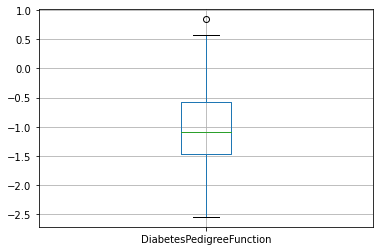

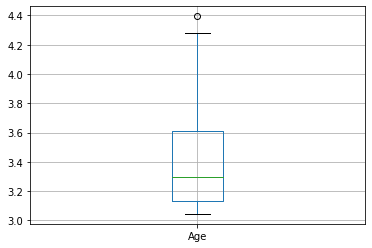

In [79]:
df2=df_non.select_dtypes(exclude=['category'])   # remove outcome in non diabetic population
for column in df2:                             # use for loop for all columns
    plt.figure()               
    df2.boxplot([column]) 

## Summary
we read data into pandas dataframe, we done basic exploration, we split data into diabetic and non diabetic population. converted daat type. handle missing values. plotted boxplot for outlier and distribution of data. calculated measure of central tendency and measure of central dispersion for normal and skewed data. we transformed data for skewed by z-score.

Author:| Harsha veena
---|---|
created on:| 26/04/2022
edited on:| 28/04/2022
IDE: |Google colab